## Citi Bike Data

In [2]:
import pandas as pd
import re
import os
from zipfile import ZipFile

In [14]:
# # Define the folder containing the zip files
# data_folder = "/Users/jiaweixu/Documents/UCHICAGO/MSADS/ADSP 31012_Data Engineering Platforms/Final Project/Raw"  # Replace with your folder path

# # Unzip all ZIP files in the folder
# def unzip_files(folder):
#     for file in os.listdir(folder):
#         if file.endswith(".zip"):
#             with ZipFile(os.path.join(folder, file), 'r') as zip_ref:
#                 zip_ref.extractall(folder)  # Extract contents into the same folder
#     print("All files unzipped!")

# # Run the function
# unzip_files(data_folder)

All files unzipped!


#### Data preparation

In [3]:
folder_path = "/Users/jiaweixu/Documents/UCHICAGO/MSADS/ADSP 31012_Data Engineering Platforms/Final Project/2022"  # Replace with your folder path

csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

if not csv_files:
    print("No CSV files found in the folder.")
else:
    all_data = []

    for file in csv_files:
        try:
            file_path = os.path.join(folder_path, file)
            
            df = pd.read_csv(file_path, low_memory=False)
            print(f"Successfully read: {file}")
            
            df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('-', '_')
            
            all_data.append(df)
        except Exception as e:
            print(f"Failed to read {file} due to: {e}")

    try:
        final_df = pd.concat(all_data, ignore_index=True)
        print(f"Successfully combined {len(csv_files)} files.")
        
        # Save the combined DataFrame to a new CSV file
        output_file = "combined_data_2022.csv"
        final_df.to_csv(output_file, index=False)
        print(f"All files combined successfully into {output_file}.")
    except Exception as e:
        print(f"Failed to combine files due to: {e}")

Successfully read: 202208-citibike-tripdata_3.csv
Successfully read: 202207-citibike-tripdata_2.csv
Successfully read: 202207-citibike-tripdata_3.csv
Successfully read: 202208-citibike-tripdata_2.csv
Successfully read: 202207-citibike-tripdata_1.csv
Successfully read: 202208-citibike-tripdata_1.csv
Successfully read: 202210-citibike-tripdata_1.csv
Successfully read: 202207-citibike-tripdata_4.csv
Successfully read: 202208-citibike-tripdata_4.csv
Successfully read: 202203-citibike-tripdata_2.csv
Successfully read: 202210-citibike-tripdata_2.csv
Successfully read: 202203-citibike-tripdata_1.csv
Successfully read: 202210-citibike-tripdata_3.csv
Successfully read: 202204-citibike-tripdata_1.csv
Successfully read: 202204-citibike-tripdata_2.csv
Successfully read: 202204-citibike-tripdata_3.csv
Successfully read: 202211-citibike-tripdata_3.csv
Successfully read: 202202-citibike-tripdata_1.csv
Successfully read: 202211-citibike-tripdata_2.csv
Successfully read: 202202-citibike-tripdata_2.csv


In [ ]:
# file_paths = [
#     "combined_data_2022.csv",
#     "combined_data_2023.csv",
#     "combined_data_2024.csv"
# ]

# # Initialize an empty list to hold the DataFrames
# all_data = []

# for file_path in file_paths:
#     try:
#         # Read the CSV file
#         df = pd.read_csv(file_path, low_memory=False)
#         print(f"Successfully read: {file_path}")
        
#         # Standardize column names (lowercase, replace spaces with underscores)
#         df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('-', '_')
        
#         # Append the DataFrame to the list
#         all_data.append(df)
#     except Exception as e:
#         print(f"Failed to read {file_path} due to: {e}")

# try:
#     final_df = pd.concat(all_data, ignore_index=True)
#     print(f"Successfully combined {len(file_paths)} files.")
    
#     # Save the combined DataFrame to a new CSV file
#     output_file = "final_combined_data.csv"
#     final_df.to_csv(output_file, index=False)
#     print(f"All files combined successfully into {output_file}.")
# except Exception as e:
#     print(f"Failed to combine files due to: {e}")

In [ ]:
# all_data = []

# for file in csv_files:
#     # Construct the full file path
#     file_path = os.path.join(folder_path, file)
    
#     df = pd.read_csv(file_path, low_memory=False)
#     print(f"now reading {file}")
    
#     if 'starttime' in df.columns:
#         df.rename(columns={'starttime': 'Start Time'}, inplace=True)
#     elif 'started_at' in df.columns:
#         df.rename(columns={'started_at': 'Start Time'}, inplace=True)
#     elif 'Start Time' not in df.columns:
#         print(f"No start time column found in {file}. Skipping...")
#         continue

#     if 'start_station_id' in df.columns:
#         df.rename(columns={'start_station_id': 'Start Station ID'}, inplace=True)
#     elif 'start station id' in df.columns:
#         df.rename(columns={'start station id': 'Start Station ID'}, inplace=True)
#     elif 'Start Station ID' not in df.columns:
#         print(f"No start station id column found in {file}. Skipping...")
#         continue
    
#     cols_of_interest = ['Start Time', 'Start Station ID']
#     df = df[cols_of_interest].copy()
    
#     all_data.append(df)

# final_df = pd.concat(all_data, ignore_index=True)

# print(final_df)

In [ ]:
# output_file = "final_combined_data.csv"

# final_df.to_csv(output_file, index=False)

# print(f"DataFrame saved successfully to {output_file}")

In [9]:
final_df

,Start Time,Start Station ID
0,2024-05-24 19:59:29,6266.06
1,2024-05-10 14:57:00,6098.10
2,2024-05-10 18:09:04,7855.03
3,2024-05-19 13:37:37,6098.10
4,2024-05-24 18:12:40,6098.10
...,...,...
135265043,2023-08-15 12:51:41.402,4060.09
135265044,2023-08-28 19:38:25.187,3882.05
135265045,2023-08-24 17:53:08.168,4060.09
135265046,2023-08-17 18:37:24.995,6991.12


In [13]:
# Count the occurrences of each Start Station ID
station_id_counts = final_df['Start Station ID'].value_counts()

print("Counts of each Start Station ID:")
print(station_id_counts)

Counts of each Start Station ID:
Start Station ID
6140.05               498184
5329.03               437967
6822.09               417377
5905.14               379323
6173.08               365962
                       ...  
JC108                      1
Liberty State Park         1
SYS025                     1
190 Morgan                 1
JC082                      1
Name: count, Length: 4493, dtype: int64


### Data Clean

In [13]:
import pandas as pd
import re

In [1]:
file_path = "combined_data_2024.csv"  # Replace with the path to your CSV file
df = pd.read_csv(file_path)

print(df.head())

/var/folders/bv/d_q6w5r536b_pgv6bn4vgh500000gn/T/ipykernel_97540/2198385902.py:5: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


            ride_id  rideable_type           started_at             ended_at  \
0  5B8178155E3EF635   classic_bike  2024-05-24 19:59:29  2024-05-24 20:03:30   
1  630CB43613E2D9E6  electric_bike  2024-05-10 14:57:00  2024-05-10 15:00:54   
2  42F8C6A54BD0D9DC  electric_bike  2024-05-10 18:09:04  2024-05-10 18:17:37   
3  9C154101F374E9F6   classic_bike  2024-05-19 13:37:37  2024-05-19 13:43:12   
4  BE0F852A34FA7CD7  electric_bike  2024-05-24 18:12:40  2024-05-24 18:17:12   

                    start_station_name start_station_id  \
0                      9 Ave & W 22 St          6266.06   
1                   Broadway & E 21 St           6098.1   
2  Adam Clayton Powell Blvd & W 138 St          7855.03   
3                   Broadway & E 21 St           6098.1   
4                   Broadway & E 21 St           6098.1   

                            end_station_name end_station_id  start_lat  \
0                     Perry St & Bleecker St        5922.07  40.745497   
1               

In [2]:
if 'unnamed:_0' in df.columns:
    df.drop(columns=['unnamed:_0'], inplace=True)

In [3]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('-', '_')

In [4]:
df['started_at'] = pd.to_datetime(df['started_at'], errors='coerce')
df['ended_at'] = pd.to_datetime(df['ended_at'], errors='coerce')

In [5]:
df = df.dropna(subset=['ride_id', 'started_at', 'ended_at', 'start_station_id', 'end_station_id'])

In [6]:
df['trip_duration_minutes'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60
df = df[df['trip_duration_minutes'] > 0]  # Remove trips with non-positive durations

In [7]:
df = df.drop_duplicates()

In [9]:
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration_minutes
0,5B8178155E3EF635,classic_bike,2024-05-24 19:59:29,2024-05-24 20:03:30,9 Ave & W 22 St,6266.06,Perry St & Bleecker St,5922.07,40.745497,-74.001971,40.735354,-74.004831,member,4.016667
1,630CB43613E2D9E6,electric_bike,2024-05-10 14:57:00,2024-05-10 15:00:54,Broadway & E 21 St,6098.1,E 20 St & 2 Ave,5971.08,40.740132,-73.989421,40.735877,-73.982050,member,3.900000
2,42F8C6A54BD0D9DC,electric_bike,2024-05-10 18:09:04,2024-05-10 18:17:37,Adam Clayton Powell Blvd & W 138 St,7855.03,Frederick Douglass Blvd & Harlem River Dr,8100.01,40.816930,-73.942420,40.830702,-73.936371,member,8.550000
3,9C154101F374E9F6,classic_bike,2024-05-19 13:37:37,2024-05-19 13:43:12,Broadway & E 21 St,6098.1,W 27 St & 6 Ave,6215.07,40.739888,-73.989586,40.745260,-73.990620,member,5.583333
4,BE0F852A34FA7CD7,electric_bike,2024-05-24 18:12:40,2024-05-24 18:17:12,Broadway & E 21 St,6098.1,E 20 St & 2 Ave,5971.08,40.740053,-73.989539,40.735877,-73.982050,member,4.533333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7447418,E8E2E8FC96A3F16F,electric_bike,2024-05-16 07:17:13,2024-05-16 07:23:15,E 2 St & Ave A,5553.10,E 16 St & Irving Pl,5938.11,40.723102,-73.985935,40.735367,-73.987974,member,6.033333
7447419,A57BE9B9D179E077,classic_bike,2024-05-16 20:05:12,2024-05-16 20:21:36,W 25 St & 8 Ave,6297.08,1 Ave & E 18 St,5854.09,40.746500,-73.997326,40.733812,-73.980544,member,16.400000
7447420,8C2FEE86C75497EB,classic_bike,2024-05-22 21:42:19,2024-05-22 21:47:46,W 22 St & 10 Ave,6306.06,Gansevoort St & Hudson St,6072.16,40.746920,-74.004519,40.739376,-74.005208,member,5.450000
7447421,8A557D952C5CB458,classic_bike,2024-05-24 15:39:09,2024-05-24 15:48:10,Scholes St & Manhattan Ave,5108.01,Metropolitan Ave & Bedford Ave,5308.04,40.708704,-73.944862,40.715348,-73.960241,member,9.016667


In [10]:
def is_valid_station_id(station_id):
    pattern = r"^\d+\.\d{1,2}$"
    return bool(re.match(pattern, str(station_id)))

df_filtered = df[df['start_station_id'].apply(is_valid_station_id)]

In [11]:
df_filtered

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration_minutes
0,5B8178155E3EF635,classic_bike,2024-05-24 19:59:29,2024-05-24 20:03:30,9 Ave & W 22 St,6266.06,Perry St & Bleecker St,5922.07,40.745497,-74.001971,40.735354,-74.004831,member,4.016667
1,630CB43613E2D9E6,electric_bike,2024-05-10 14:57:00,2024-05-10 15:00:54,Broadway & E 21 St,6098.1,E 20 St & 2 Ave,5971.08,40.740132,-73.989421,40.735877,-73.982050,member,3.900000
2,42F8C6A54BD0D9DC,electric_bike,2024-05-10 18:09:04,2024-05-10 18:17:37,Adam Clayton Powell Blvd & W 138 St,7855.03,Frederick Douglass Blvd & Harlem River Dr,8100.01,40.816930,-73.942420,40.830702,-73.936371,member,8.550000
3,9C154101F374E9F6,classic_bike,2024-05-19 13:37:37,2024-05-19 13:43:12,Broadway & E 21 St,6098.1,W 27 St & 6 Ave,6215.07,40.739888,-73.989586,40.745260,-73.990620,member,5.583333
4,BE0F852A34FA7CD7,electric_bike,2024-05-24 18:12:40,2024-05-24 18:17:12,Broadway & E 21 St,6098.1,E 20 St & 2 Ave,5971.08,40.740053,-73.989539,40.735877,-73.982050,member,4.533333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7447418,E8E2E8FC96A3F16F,electric_bike,2024-05-16 07:17:13,2024-05-16 07:23:15,E 2 St & Ave A,5553.10,E 16 St & Irving Pl,5938.11,40.723102,-73.985935,40.735367,-73.987974,member,6.033333
7447419,A57BE9B9D179E077,classic_bike,2024-05-16 20:05:12,2024-05-16 20:21:36,W 25 St & 8 Ave,6297.08,1 Ave & E 18 St,5854.09,40.746500,-73.997326,40.733812,-73.980544,member,16.400000
7447420,8C2FEE86C75497EB,classic_bike,2024-05-22 21:42:19,2024-05-22 21:47:46,W 22 St & 10 Ave,6306.06,Gansevoort St & Hudson St,6072.16,40.746920,-74.004519,40.739376,-74.005208,member,5.450000
7447421,8A557D952C5CB458,classic_bike,2024-05-24 15:39:09,2024-05-24 15:48:10,Scholes St & Manhattan Ave,5108.01,Metropolitan Ave & Bedford Ave,5308.04,40.708704,-73.944862,40.715348,-73.960241,member,9.016667


In [12]:
print(df_filtered.head())

            ride_id  rideable_type          started_at            ended_at  \
0  5B8178155E3EF635   classic_bike 2024-05-24 19:59:29 2024-05-24 20:03:30   
1  630CB43613E2D9E6  electric_bike 2024-05-10 14:57:00 2024-05-10 15:00:54   
2  42F8C6A54BD0D9DC  electric_bike 2024-05-10 18:09:04 2024-05-10 18:17:37   
3  9C154101F374E9F6   classic_bike 2024-05-19 13:37:37 2024-05-19 13:43:12   
4  BE0F852A34FA7CD7  electric_bike 2024-05-24 18:12:40 2024-05-24 18:17:12   

                    start_station_name start_station_id  \
0                      9 Ave & W 22 St          6266.06   
1                   Broadway & E 21 St           6098.1   
2  Adam Clayton Powell Blvd & W 138 St          7855.03   
3                   Broadway & E 21 St           6098.1   
4                   Broadway & E 21 St           6098.1   

                            end_station_name end_station_id  start_lat  \
0                     Perry St & Bleecker St        5922.07  40.745497   
1                           

In [ ]:
# output_file = "filtered_combined_data_2024.csv"
# df_filtered.to_csv(output_file, index=False)

# print(f"Filtered dataset saved to {output_file}")
# print(df_filtered.head())

### EDA

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
df_eda = df_filtered

In [16]:
df_eda

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration_minutes
0,5B8178155E3EF635,classic_bike,2024-05-24 19:59:29,2024-05-24 20:03:30,9 Ave & W 22 St,6266.06,Perry St & Bleecker St,5922.07,40.745497,-74.001971,40.735354,-74.004831,member,4.016667
1,630CB43613E2D9E6,electric_bike,2024-05-10 14:57:00,2024-05-10 15:00:54,Broadway & E 21 St,6098.1,E 20 St & 2 Ave,5971.08,40.740132,-73.989421,40.735877,-73.982050,member,3.900000
2,42F8C6A54BD0D9DC,electric_bike,2024-05-10 18:09:04,2024-05-10 18:17:37,Adam Clayton Powell Blvd & W 138 St,7855.03,Frederick Douglass Blvd & Harlem River Dr,8100.01,40.816930,-73.942420,40.830702,-73.936371,member,8.550000
3,9C154101F374E9F6,classic_bike,2024-05-19 13:37:37,2024-05-19 13:43:12,Broadway & E 21 St,6098.1,W 27 St & 6 Ave,6215.07,40.739888,-73.989586,40.745260,-73.990620,member,5.583333
4,BE0F852A34FA7CD7,electric_bike,2024-05-24 18:12:40,2024-05-24 18:17:12,Broadway & E 21 St,6098.1,E 20 St & 2 Ave,5971.08,40.740053,-73.989539,40.735877,-73.982050,member,4.533333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7447418,E8E2E8FC96A3F16F,electric_bike,2024-05-16 07:17:13,2024-05-16 07:23:15,E 2 St & Ave A,5553.10,E 16 St & Irving Pl,5938.11,40.723102,-73.985935,40.735367,-73.987974,member,6.033333
7447419,A57BE9B9D179E077,classic_bike,2024-05-16 20:05:12,2024-05-16 20:21:36,W 25 St & 8 Ave,6297.08,1 Ave & E 18 St,5854.09,40.746500,-73.997326,40.733812,-73.980544,member,16.400000
7447420,8C2FEE86C75497EB,classic_bike,2024-05-22 21:42:19,2024-05-22 21:47:46,W 22 St & 10 Ave,6306.06,Gansevoort St & Hudson St,6072.16,40.746920,-74.004519,40.739376,-74.005208,member,5.450000
7447421,8A557D952C5CB458,classic_bike,2024-05-24 15:39:09,2024-05-24 15:48:10,Scholes St & Manhattan Ave,5108.01,Metropolitan Ave & Bedford Ave,5308.04,40.708704,-73.944862,40.715348,-73.960241,member,9.016667


In [17]:
print("Basic Info:")
print(df_eda.info())  

print("\nDescriptive Statistics:")
print(df_eda.describe())

Basic Info:
<class 'pandas.core.frame.DataFrame'>
Index: 4218128 entries, 0 to 7447422
Data columns (total 14 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ride_id                object        
 1   rideable_type          object        
 2   started_at             datetime64[ns]
 3   ended_at               datetime64[ns]
 4   start_station_name     object        
 5   start_station_id       object        
 6   end_station_name       object        
 7   end_station_id         object        
 8   start_lat              float64       
 9   start_lng              float64       
 10  end_lat                float64       
 11  end_lng                float64       
 12  member_casual          object        
 13  trip_duration_minutes  float64       
dtypes: datetime64[ns](2), float64(5), object(7)
memory usage: 482.7+ MB
None

Descriptive Statistics:
                          started_at                       ended_at  \
count             

##### 1. Distribution of Trip Durations


Trip Duration Statistics:
count    4.218128e+06
mean     1.346070e+01
std      2.178532e+01
min      1.666667e-02
25%      5.200000e+00
50%      9.300000e+00
75%      1.643333e+01
max      1.498283e+03
Name: trip_duration_minutes, dtype: float64


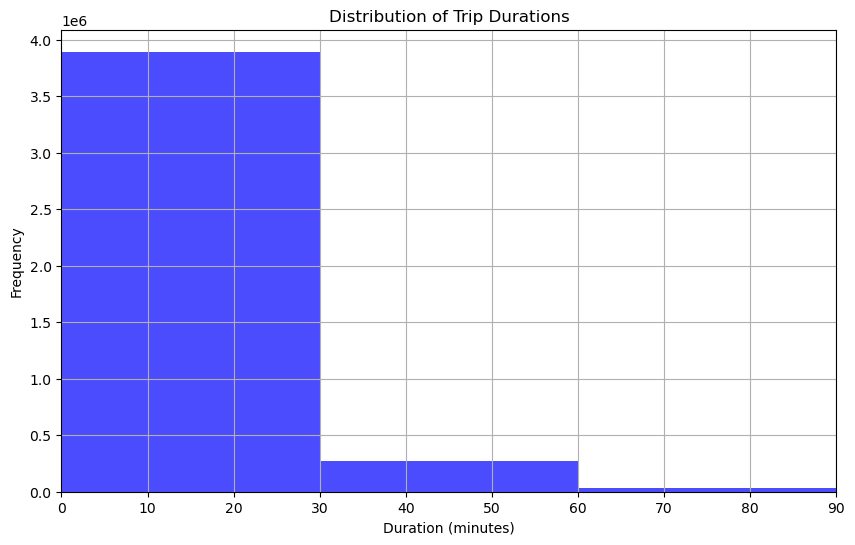

In [25]:
print("\nTrip Duration Statistics:")
print(df_eda['trip_duration_minutes'].describe())

# Plot the distribution of trip durations
plt.figure(figsize=(10, 6))
df_eda['trip_duration_minutes'].plot(kind='hist', bins=50, alpha=0.7, color='blue')
plt.title("Distribution of Trip Durations")
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")
plt.xlim(0, 90)
plt.grid(True)
plt.show()

##### 2. Popular Start and End Stations


Top 5 Start Stations:
start_station_name
West St & Chambers St      15394
W 21 St & 6 Ave            14981
University Pl & E 14 St    14255
8 Ave & W 31 St            13798
Broadway & W 58 St         12424
Name: count, dtype: int64

Top 5 End Stations:
end_station_name
West St & Chambers St      15463
W 21 St & 6 Ave            15028
University Pl & E 14 St    14335
8 Ave & W 31 St            13810
Broadway & W 58 St         12434
Name: count, dtype: int64


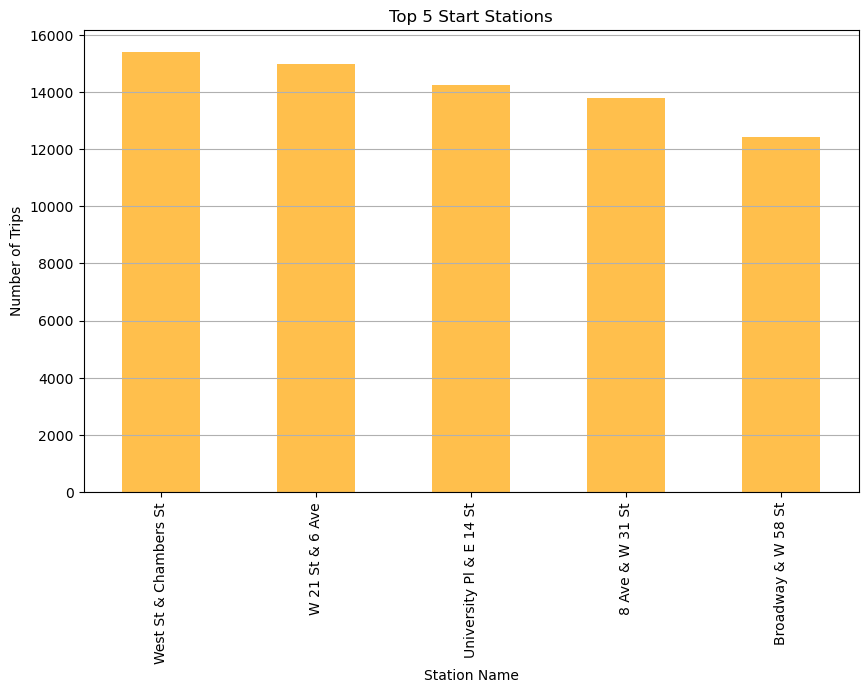

In [20]:
print("\nTop 5 Start Stations:")
print(df_eda['start_station_name'].value_counts().head())

print("\nTop 5 End Stations:")
print(df_eda['end_station_name'].value_counts().head())

# Bar plot of the top 5 start stations
top_start_stations = df_eda['start_station_name'].value_counts().head(5)
top_start_stations.plot(kind='bar', figsize=(10, 6), color='orange', alpha=0.7)
plt.title("Top 5 Start Stations")
plt.xlabel("Station Name")
plt.ylabel("Number of Trips")
plt.grid(axis='y')
plt.show()

##### 3. Rideable Type


Rideable Type Distribution:
rideable_type
electric_bike    2727575
classic_bike     1490553
Name: count, dtype: int64


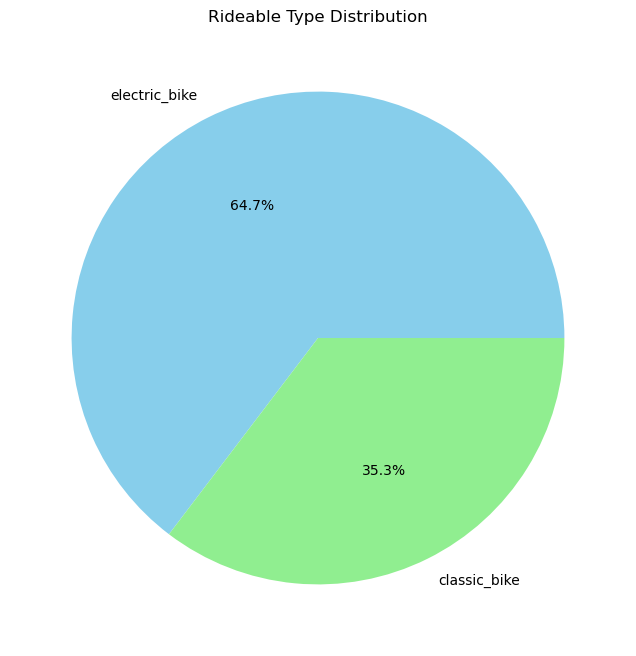

In [21]:
print("\nRideable Type Distribution:")
print(df_eda['rideable_type'].value_counts())

# Pie chart for rideable type
df_eda['rideable_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), colors=['skyblue', 'lightgreen', 'orange'])
plt.title("Rideable Type Distribution")
plt.ylabel("")
plt.show()

##### 4. Member vs. Casual Riders


Member vs. Casual Distribution:
member_casual
member    3356013
casual     862115
Name: count, dtype: int64


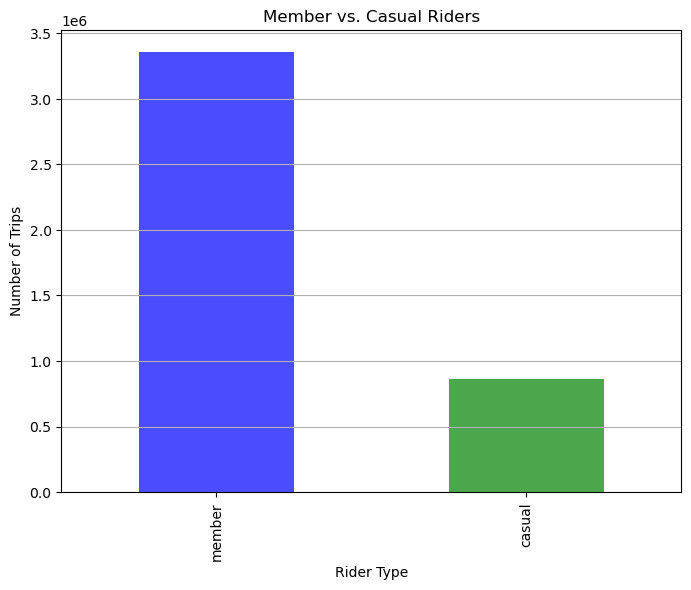

In [22]:
print("\nMember vs. Casual Distribution:")
print(df_eda['member_casual'].value_counts())

# Bar plot for member vs. casual
df_eda['member_casual'].value_counts().plot(kind='bar', figsize=(8, 6), color=['blue', 'green'], alpha=0.7)
plt.title("Member vs. Casual Riders")
plt.xlabel("Rider Type")
plt.ylabel("Number of Trips")
plt.grid(axis='y')
plt.show()

##### 5. Most Common Trip Routes

/var/folders/bv/d_q6w5r536b_pgv6bn4vgh500000gn/T/ipykernel_97540/3788261148.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eda['trip_route'] = df_eda['start_station_name'] + " -> " + df_eda['end_station_name']



Top 5 Most Common Trip Routes:
trip_route
Murray St & Greenwich St -> Murray St & West St             2392
Murray St & West St -> Murray St & Greenwich St             2111
7 Ave & Central Park South -> 7 Ave & Central Park South    1638
Central Park S & 6 Ave -> Central Park S & 6 Ave            1628
River Ter & Warren St -> Vesey Pl & River Terrace           1411
Name: count, dtype: int64


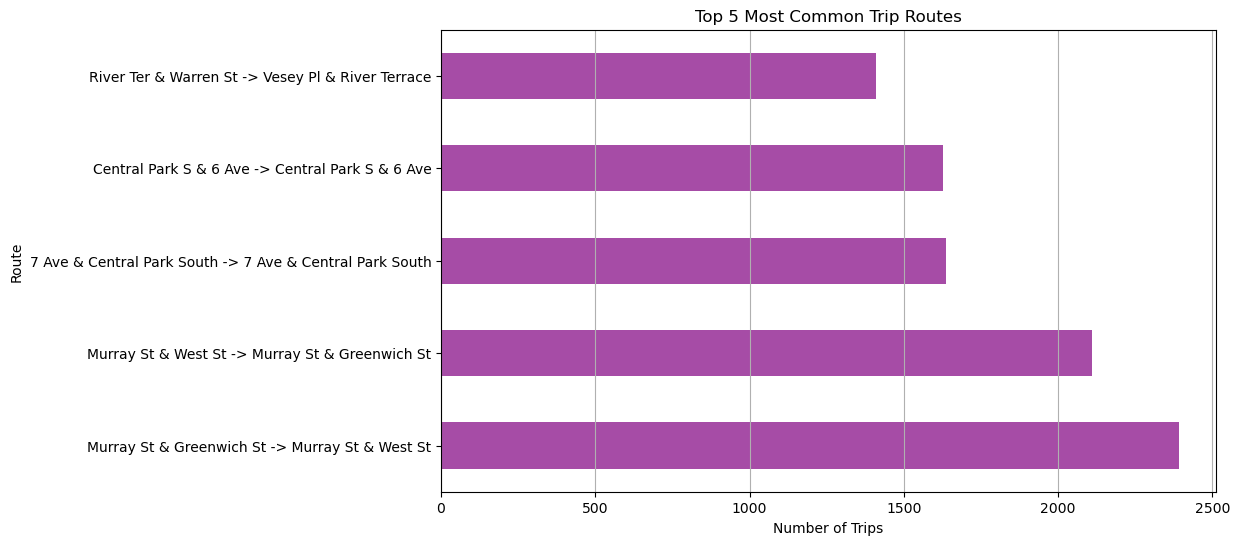

In [23]:
df_eda['trip_route'] = df_eda['start_station_name'] + " -> " + df_eda['end_station_name']

print("\nTop 5 Most Common Trip Routes:")
print(df_eda['trip_route'].value_counts().head())

# Bar plot for top 5 most common trip routes
top_routes = df_eda['trip_route'].value_counts().head(5)
top_routes.plot(kind='barh', figsize=(10, 6), color='purple', alpha=0.7)
plt.title("Top 5 Most Common Trip Routes")
plt.xlabel("Number of Trips")
plt.ylabel("Route")
plt.grid(axis='x')
plt.show()